<a href="https://colab.research.google.com/github/cristianmunoz1/ai4eng-proyecto/blob/main/12%20-%20modelo%20con%20preprocesado%20sin%20algunas%20columnas%20y%20departamento%20y%20RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest con preprocesado Dep y sin algunas columnas

## Consideraciones iniciales
Configuramos las variables de entorno y damos permisos de lectura y escritura al archivo kaggle.json para manejar el token de Kaggle y enviar la solución desde el notebook.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json

## Importes necesarios
Importamos las siguientes librerías:
*   pandas: Con el objetivo de trabajar con Dataframes para hacer manipulables de manera más sencilla los datos del csv.
*   numpy: Para trabajar con vectores ya sea numéricos o categóricos.
*   RandomForestClassifier: Este módulo de Scikitlearn nos permitirá crear un modelo de tipo RandomForest para realizar nuestra clasificación de sujetos en las predicciones que realizaremos.
*   train_test_split: Este módulo de Scikitlearn permitirá partir los datos de X en 4 partes, los X para train y test, y los y para train y test.
*   matplotlib: Nos ayudará a encontrar gráficas que puedan ayudarnos a la hora de la evaluación del modelo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Lectura de archivos de train y test

In [ ]:
train = pd.read_csv('train4.csv')
test = pd.read_csv('test4.csv')

Visualizamos los primeros 5 datos de train

In [ ]:
train.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,"('administracion de empresas',)","('administracion en salud ocupacional',)","('administracion financiera',)","('arquitectura',)",...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,1,7.0,4.0,8.0,12.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,1,5.0,4.0,9.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,1,5.0,4.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,1,6.0,5.0,2.0,7.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,1,5.0,4.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1


Visualizamos los primeros 5 datos de test

In [ ]:
test.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,"('administracion de empresas',)","('administracion en salud ocupacional',)","('administracion financiera',)","('arquitectura',)",...,"('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_no info,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,550236,0,2.0,4.0,9.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
1,98545,1,5.0,3.0,7.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
2,499179,1,4.0,4.0,6.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
3,782980,0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,785185,1,5.0,3.0,7.0,7.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1


Visualizamos cuales son las columnas que trae el csv de train

In [ ]:
train.columns

Index(['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'RENDIMIENTO_GLOBAL', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'FAMI_TIENEINTERNET_No',
       'FAMI_TIENEINTERNET_Si'],
      dtype='object')

Visualizamos cuales son las columnas que trae el csv de test

In [ ]:
test.columns

Index(['ID', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'ESTU_PAGOMATRICULAPROPIO_no info',
       'FAMI_TIENEINTERNET_No', 'FAMI_TIENEINTERNET_Si'],
      dtype='object')

## Procesamiento de datos

Eliminamos la columna rendimiento global para nuestro train ya que es lo que queremos predecir.

In [ ]:
X = train.drop('RENDIMIENTO_GLOBAL', axis = 1)

X queda con la siguiente forma:

In [ ]:
X.shape

(686002, 30)

Los primeros 5 datos de X son:

In [ ]:
X.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,"('administracion de empresas',)","('administracion en salud ocupacional',)","('administracion financiera',)","('arquitectura',)","('comunicacion social',)",...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,1,7.0,4.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,1,5.0,4.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,1,5.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,1,6.0,5.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,1,5.0,4.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1


Las columnas que tiene X hasta el momento son las siguientes:

In [ ]:
X.columns

Index(['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'FAMI_TIENEINTERNET_No',
       'FAMI_TIENEINTERNET_Si'],
      dtype='object')

Traemos la columna de rendimiento global a la variable $y$ que es la que queremos predecir y con la que podremos calcular el accuracy tanto en entrenamiento como en test.

In [ ]:
y = train['RENDIMIENTO_GLOBAL'].values

In [ ]:
np.unique(X)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
np.unique(y)

array([1., 2., 3., 4.])

### Obtención de datos para el test del modelo.

In [ ]:
Xtest = test.drop('ID', axis = 1)

In [ ]:
Xtest.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,"('administracion de empresas',)","('administracion en salud ocupacional',)","('administracion financiera',)","('arquitectura',)","('comunicacion social',)",...,"('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_no info,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,0,2.0,4.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
1,1,5.0,3.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
2,1,4.0,4.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
3,0,4.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,1,5.0,3.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1


In [ ]:
Xtest.columns

Index(['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU_PAGOMATRICULAPROPIO_Si', 'ESTU_PAGOMATRICULAPROPIO_no info',
       'FAMI_TIENEINTERNET_No', 'FAMI_TIENEINTERNET_Si'],
      dtype='object')

In [ ]:
Xtest.shape

(296786, 31)

Los valores únicos de Xtest son

In [ ]:
np.unique(Xtest)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

Decidimos que usaremos un 30% de datos de test para entrenar el modelo con un 70% de datos de train.
Realizamos la partición de los datos de X.

In [ ]:
test_size = 0.3

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(480201, 30) (205801, 30)


## Instanciación del modelo RandomForestClassifier

In [ ]:
estimator = RandomForestClassifier(max_depth=11, criterion="log_loss")

### Entrenamiento del modelo con los datos que partimos

In [ ]:
estimator.fit(Xtr, ytr)

RandomForestClassifier(criterion='log_loss', max_depth=11)

### Accuracy del modelo en train y en test.

In [ ]:
estimator.score(Xtr, ytr), estimator.score(Xts,yts)


(0.41128194235330623, 0.39784549151850573)

Eliminamos la columna 'ESTU_PAGOMATRICULAPROPIA_no info'

In [ ]:
Xtest = Xtest.drop('ESTU_PAGOMATRICULAPROPIO_no info', axis = 1)

## Predicciones del modelo con los datos de test.

In [ ]:
predicciones = estimator.predict(Xtest)

Redondeamos las predicciones ya que daban un número decimal pero se quería que solo cayera en números enteros del 1 al 4

In [ ]:
predicciones = np.round(predicciones)

In [ ]:
len(predicciones)

296786

In [ ]:
predicciones[:10]

array([1., 3., 3., 1., 2., 1., 4., 4., 1., 4.])

### Gráfica de las primeras 10 predicciones

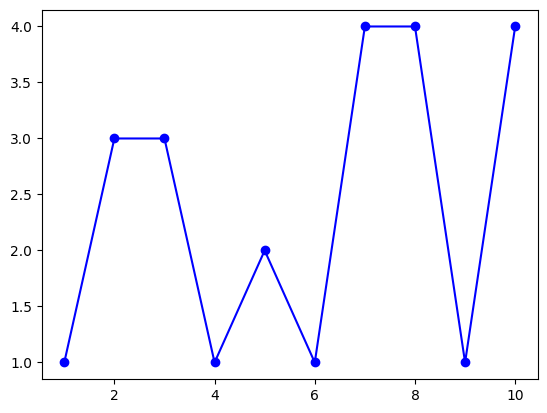

In [ ]:
plt.plot(range(1, 11), predicciones[:10], 'b-o')

## Preparación de datos para el envío a Kaggle

Obtenemos los ids de los estudiantes con los que queremos realizar predicciones. Del Dataframe test.

In [ ]:
idTest = pd.DataFrame(test["ID"])


Relacionamos los datos numéricos que nos arroja la predicción con cada dato específico. Nótese que en el primer dato hay un espacio vacío. Esto es debido a que nuestras predicciones se lanzan de 1 a 4, pero el modelo realiza predicciones desde cero, por lo tanto, necesitamos una manera de mitigar este desnivel en las categorías.

In [ ]:
Reference = [' ','bajo', 'medio-bajo', 'medio-alto', 'alto']
y_preditionReference = [Reference[int(i)] for i in predicciones]

idTest['RENDIMIENTO_GLOBAL'] = pd.Series(y_preditionReference, name='RENDIMIENTO_GLOBAL')
idTest[idTest['RENDIMIENTO_GLOBAL'] == 0]

In [ ]:
idTest.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,medio-alto
3,782980,bajo
4,785185,medio-bajo


In [ ]:
idTest.shape

(296786, 2)

Creamos el archivo csv con todas las predicciones que realizamos.

In [ ]:
idTest.to_csv('submissionDt.csv', index = False)

In [ ]:
!head submissionDt.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,medio-alto
782980,bajo
785185,medio-bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


Enviamos el archivo con la solución a Kaggle para su validación.

In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f submissionDt.csv -m "Envío de predicciones usando un RandomForest con preprocesado dep y sin algunas columnas"

100% 3.93M/3.93M [00:00<00:00, 19.9MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia